<a href="https://colab.research.google.com/github/ManojBhuma/Masters-Project-IOT/blob/child-branch/IoT_23_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
#importing pandas and numpy, datetime
import pandas as pd
import numpy as np
from datetime import datetime
# visualization tools
import matplotlib.pyplot as plt
# Train Test Split
from sklearn.model_selection import train_test_split
# ML classifier Models
from sklearn.neural_network import MLPClassifier
# cross validation and metrics libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
# Randomunder sampler for treating class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.models import *
from keras.layers import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-9-1/conn.log.labeled')
CTU_IoT_Malware_Capture_9_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_9_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_9_1.iloc[1][1:]
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_9_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_9_1.shape)
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_9_1

(6378293, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1532510451.648888,CnR6zKxrWbFw26ua7,192.168.100.111,40008,46.28.110.244,123,udp,-,0.004751,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
1,1532511003.118878,CcfURS3zgEMzX0RqTc,192.168.100.102,57849,192.168.100.111,22,tcp,-,108.421563,2376,96,OTH,-,-,0,DAd,5,332,2,200,(empty),Benign,-
2,1532511739.837566,CPhAqD1EhNOoPVA6ha,192.168.100.102,59670,192.168.100.111,22,tcp,-,0.001244,21,0,S0,-,-,0,SAD,3,189,0,0,(empty),Benign,-
3,1532512077.774888,CFr56iYeYk4YZXrPf,192.168.100.102,59701,192.168.100.111,22,tcp,-,0.000738,21,0,S0,-,-,0,SAD,3,189,0,0,(empty),Benign,-
4,1532512335.605565,C8a9xW23hF8nDgeNtj,192.168.100.111,36199,192.168.100.1,53,udp,dns,-,-,-,S0,-,-,0,D,1,58,0,0,(empty),Benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378288,1532595195.007148,CIHonx2ymqlX5DqnU2,192.168.100.111,28057,173.94.58.125,23,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty),Malicious,PartOfAHorizontalPortScan
6378289,1532594748.215022,CwhtUD3BIdOP5L6Y8g,192.168.100.111,52876,69.196.96.231,23,tcp,-,209.874367,0,0,S1,-,-,0,ShA,8,360,1,44,(empty),Benign,-
6378290,1532591674.249972,CxHWyM2vp5x1mCZmp3,192.168.100.111,39234,192.121.45.63,23,tcp,-,165.760290,0,0,S1,-,-,0,ShA,5,220,1,44,(empty),Benign,-
6378291,1532595145.171589,CtmaRjXW7FOus0sPa,168.102.14.4,11,192.168.100.111,0,icmp,-,-,-,-,OTH,-,-,0,-,1,68,0,0,(empty),Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-1-1/conn.log.labeled')
CTU_IoT_Malware_Capture_1_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_1_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_1_1.iloc[1][1:]
CTU_IoT_Malware_Capture_1_1  = CTU_IoT_Malware_Capture_1_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_1_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_1_1.shape)
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_1_1.head()

(1008748, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1525879831.015811,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
1,1525879831.025055,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
2,1525879831.045045,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
3,1525879832.016240,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
4,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-20-1/conn.log.labeled')
CTU_IoT_Malware_Capture_20_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_20_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_20_1.iloc[1][1:]
CTU_IoT_Malware_Capture_20_1  = CTU_IoT_Malware_Capture_20_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_20_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_20_1.shape)
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_20_1.head()

(3209, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1538478769.600293,CSQG794riQ4XnzTxP2,192.168.100.103,37082,192.168.100.1,53,udp,dns,5.005151,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
1,1538478779.610847,COTbdG2BhtGBlmf6r,192.168.100.103,34486,192.168.100.1,53,udp,dns,0.007243,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
2,1538478789.630642,CP48WJ2HOnLuGtr5kb,192.168.100.103,37601,192.168.100.1,53,udp,dns,0.002250,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
3,1538478779.620088,CeTMJi2TydRSaVdsG4,192.168.100.103,46439,192.168.100.1,53,udp,dns,5.005154,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
4,1538478799.645444,CZ6ne24AN9WAg9XA9d,192.168.100.103,55174,192.168.100.1,53,udp,dns,0.002246,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-21-1/conn.log.labeled')
CTU_IoT_Malware_Capture_21_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_21_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_21_1.iloc[1][1:]
CTU_IoT_Malware_Capture_21_1  = CTU_IoT_Malware_Capture_21_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_21_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_21_1.shape)
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_21_1.head()


(3286, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1538572953.710599,Cu3Tieri43IPsyBO3,192.168.100.113,42789,192.168.100.1,53,udp,dns,-,-,-,S0,-,-,0,D,1,67,0,0,-,Benign,-
1,1538572958.715995,Cbetl72NeXczaqQ8Lj,192.168.100.113,60546,192.168.100.1,53,udp,dns,0.001494,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
2,1538572982.666603,CUmQWl2ZA2hrbNtohe,192.168.100.113,37320,192.168.100.1,53,udp,dns,5.005135,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
3,1538572992.677145,C9oEZWtG35wx1Mqq5,192.168.100.113,51338,192.168.100.1,53,udp,dns,0.001483,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
4,1538572992.679377,CbhqpU1oZZyrP7PE6i,192.168.100.113,60088,192.168.100.1,53,udp,dns,5.038625,117,142,SF,-,-,0,Dd,3,201,2,198,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-3-1/conn.log.labeled')
CTU_IoT_Malware_Capture_3_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_3_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_3_1.iloc[1][1:]
CTU_IoT_Malware_Capture_3_1  = CTU_IoT_Malware_Capture_3_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_3_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_3_1.shape)
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_3_1.head()



(156103, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1526756261.866500,C9YvmJ3zxtuqxWxLW5,192.168.2.5,38792,200.168.87.203,59353,tcp,-,2.998333,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
1,1526756268.874876,CGsZqZ3UiQexLzPRVb,192.168.2.5,38792,200.168.87.203,59353,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
2,1526756272.877722,C0LkBW2VEa292Nvet8,192.168.2.5,38793,200.168.87.203,59353,tcp,-,2.997182,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
3,1526756279.884959,CMDLrn2cVhrqvW8gKa,192.168.2.5,38793,200.168.87.203,59353,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
4,1526756283.888751,C2UM8f4knuL5Vnvp3h,192.168.2.5,38794,200.168.87.203,59353,tcp,-,2.996286,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-34-1/conn.log.labeled')
CTU_IoT_Malware_Capture_34_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_34_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_34_1.iloc[1][1:]
CTU_IoT_Malware_Capture_34_1  = CTU_IoT_Malware_Capture_34_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_34_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_34_1.shape)
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_34_1.head()



(23145, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1545403816.962094,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
1,1545403824.181240,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
2,1545403832.341331,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
3,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-42-1/conn.log.labeled')
CTU_IoT_Malware_Capture_42_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_42_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_42_1.iloc[1][1:]
CTU_IoT_Malware_Capture_42_1  = CTU_IoT_Malware_Capture_42_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_42_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_42_1.shape)
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_42_1.head()




(4426, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1547127288.026074,CXY5uG2sSmjJ0grfY2,192.168.1.197,58312,104.24.96.120,80,tcp,http,3.909013,83,67212,SF,-,-,4380,ShADadttFf,54,3371,50,69224,-,Malicious,FileDownload
1,1547127288.018828,Ce3AJzwzXwM3Z1XBg,192.168.1.197,45082,104.24.97.120,80,tcp,http,4.767024,150,67212,SF,-,-,0,ShADadttFf,54,2938,50,69224,-,Malicious,C&C-FileDownload
2,1547127292.857808,CJgnSb3XpbbOcMHKUd,192.168.1.197,58316,104.24.96.120,80,tcp,-,3.107228,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
3,1547127287.987598,Cq43w4aHlsW8nXZ3l,192.168.1.197,59357,192.168.1.1,53,udp,dns,0.029483,58,146,SF,-,-,0,Dd,2,114,2,202,-,Benign,-
4,1547127288.023327,C5uLwl2hGy10y9PSr6,192.168.1.197,39686,192.168.1.1,53,udp,dns,0.001249,58,146,SF,-,-,0,Dd,2,114,2,202,-,Benign,-


In [ ]:

import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-8-1/conn.log.labeled')
CTU_IoT_Malware_Capture_8_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_8_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_8_1.iloc[1][1:]
CTU_IoT_Malware_Capture_8_1  = CTU_IoT_Malware_Capture_8_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_8_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_8_1.shape)
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_8_1.head()


(10403, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1533042911.474174,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
1,1533042921.474234,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
2,1533042944.474388,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
3,1533042976.474182,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
4,1533042988.474356,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-


In [ ]:
HoneypotCapture41 = ('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-4-1/bro/conn.log.labeled')
f = open(HoneypotCapture41)
CTU_IoT_Honeypot_Capture_4_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_4_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_4_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_4_1  = CTU_IoT_Honeypot_Capture_4_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_4_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_4_1.shape)
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_4_1.head()

(452, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1540469302.538640,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,48,SF,-,-,0,Dd,1,76,1,76,-,benign,-
1,1540469197.400159,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,0,S0,-,-,0,D,24,8208,0,0,-,benign,-
2,1540469385.734089,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,48,SF,-,-,0,Dd,1,76,1,76,-,benign,-
3,1540469831.302625,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,0,SF,-,-,0,ShAFf,5,212,3,144,-,benign,-
4,1540469831.265405,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,311,SF,-,-,0,Dd,1,62,1,339,-,benign,-


In [ ]:

import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-5-1/bro/conn.log.labeled')
CTU_IoT_Honeypot_Capture_5_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_5_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_5_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_5_1  = CTU_IoT_Honeypot_Capture_5_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_5_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_5_1.shape)
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_5_1.head()


(1374, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1537522822.965530,CJAF5z3MDFg4XVDXB,0.0.0.0,68,255.255.255.255,67,udp,dhcp,8.322388,600,0,S0,-,-,0,D,2,656,0,0,-,benign,-
1,1537522897.732295,CcYEFX3Qj9xdNX1ZCa,192.168.2.1,5353,224.0.0.251,5353,udp,dns,-,-,-,S0,-,-,0,D,1,391,0,0,-,benign,-
2,1537522897.732374,CF6fCK1nFqvI1XxGM1,fe80::80e6:50ff:fe12:1464,5353,ff02::fb,5353,udp,dns,-,-,-,S0,-,-,0,D,1,411,0,0,-,benign,-
3,1537522897.732507,C2dlio3MkdwWJ80y04,169.254.15.115,5353,224.0.0.251,5353,udp,dns,-,-,-,S0,-,-,0,D,1,391,0,0,-,benign,-
4,1537522899.498805,COrF0t2uLErai9nfH5,0.0.0.0,68,255.255.255.255,67,udp,dhcp,60.555587,3000,0,S0,-,-,0,D,10,3280,0,0,-,benign,-


In [ ]:
HoneypotCapture71 = ('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-7-1/Somfy-01/bro/conn.log.labeled')
f = open(HoneypotCapture71)
CTU_IoT_Honeypot_Capture_7_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_7_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_7_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_7_1  = CTU_IoT_Honeypot_Capture_7_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_7_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_7_1.shape)
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_7_1.head()

(130, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,1562160024.472592,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-


In [ ]:
data = pd.concat([CTU_IoT_Honeypot_Capture_7_1,
                  CTU_IoT_Honeypot_Capture_5_1,
                  CTU_IoT_Honeypot_Capture_4_1,
                  CTU_IoT_Malware_Capture_1_1, 
                  CTU_IoT_Malware_Capture_3_1,
                  CTU_IoT_Malware_Capture_8_1,
                  CTU_IoT_Malware_Capture_9_1,
                  CTU_IoT_Malware_Capture_20_1,
                  CTU_IoT_Malware_Capture_21_1, 
                  CTU_IoT_Malware_Capture_34_1, 
                  CTU_IoT_Malware_Capture_42_1])
print(data.shape)
data.head()

(7589569, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,1562160024.472592,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-


#inspecting

In [ ]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589569 entries, 0 to 4425
Data columns (total 23 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ts              object
 1   uid             object
 2   id.orig_h       object
 3   id.orig_p       object
 4   id.resp_h       object
 5   id.resp_p       object
 6   proto           object
 7   service         object
 8   duration        object
 9   orig_bytes      object
 10  resp_bytes      object
 11  conn_state      object
 12  local_orig      object
 13  local_resp      object
 14  missed_bytes    object
 15  history         object
 16  orig_pkts       object
 17  orig_ip_bytes   object
 18  resp_pkts       object
 19  resp_ip_bytes   object
 20  tunnel_parents  object
 21  label           object
 22  detailed-label  object
dtypes: object(23)
memory usage: 1.4+ GB


#Dropping date time column

In [ ]:
# Dropping 'ts' Date column.
data = data.iloc[:,1:]
data

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,Cg18Jr15pQhdJUELL4,192.168.1.197,123,82.113.53.40,123,udp,-,-,-,-,S0,-,-,0,D,1,76,0,0,-,Benign,-
4422,CF56fv3yDg2vRnegKa,192.168.1.197,123,89.221.214.130,123,udp,-,0.003995,48,48,SF,-,-,0,Dd,1,76,1,76,-,Benign,-
4423,Ccvd9l4NjDPEkD1nRd,192.168.1.197,123,81.2.248.189,123,udp,-,0.005252,48,48,SF,-,-,0,Dd,1,76,1,76,-,Benign,-
4424,C07GbT1HxlFUEjwiNh,185.244.25.183,4975,192.168.1.197,50516,tcp,-,30007.122211,8499,8025,OTH,-,-,0,DdAa,654,42791,348,26493,-,Benign,-


# Checking null:

In [ ]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589569 entries, 0 to 4425
Data columns (total 22 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   uid             object
 1   id.orig_h       object
 2   id.orig_p       object
 3   id.resp_h       object
 4   id.resp_p       object
 5   proto           object
 6   service         object
 7   duration        object
 8   orig_bytes      object
 9   resp_bytes      object
 10  conn_state      object
 11  local_orig      object
 12  local_resp      object
 13  missed_bytes    object
 14  history         object
 15  orig_pkts       object
 16  orig_ip_bytes   object
 17  resp_pkts       object
 18  resp_ip_bytes   object
 19  tunnel_parents  object
 20  label           object
 21  detailed-label  object
dtypes: object(22)
memory usage: 1.3+ GB


In [ ]:
# Missing NaN Values Check
100*(data.isnull().sum()/len(data))

uid               0.0
id.orig_h         0.0
id.orig_p         0.0
id.resp_h         0.0
id.resp_p         0.0
proto             0.0
service           0.0
duration          0.0
orig_bytes        0.0
resp_bytes        0.0
conn_state        0.0
local_orig        0.0
local_resp        0.0
missed_bytes      0.0
history           0.0
orig_pkts         0.0
orig_ip_bytes     0.0
resp_pkts         0.0
resp_ip_bytes     0.0
tunnel_parents    0.0
label             0.0
detailed-label    0.0
dtype: float64

# Preprocessing
Handling Missing Values:

In [ ]:
print('Checking if any ip addresses in "id.orig_h, id.resp_h" are missing shown by "::"')
flag1=0
flag2=0
for i in data['id.orig_h'].value_counts().index:
  if('::'==i):
    flag1=1
for i in data['id.resp_h'].value_counts().index:
  if('::'==i):
    flag2=1

    
if(flag1==1):
  print('id.orig_h has missing ip addresses')
else:
  print('id.orig_h has No missing ip addresses')
if(flag2==1):
  print('id.resp_h has missing ip addresses')
else:
  print('id.resp_h has No missing ip addresses')

Checking if any ip addresses in "id.orig_h, id.resp_h" are missing shown by "::"
id.orig_h has missing ip addresses
id.resp_h has No missing ip addresses


In [ ]:
# Missing Data replacement
blank_data_columns = []
print('Columns that contain blank data i.e., "-"  are:')
for i,j in enumerate(data):
  if (('-' in str(data[j].value_counts().index))):
      blank_data_columns.append(j)
blank_data_columns


Columns that contain blank data i.e., "-"  are:


['service',
 'duration',
 'orig_bytes',
 'resp_bytes',
 'local_orig',
 'local_resp',
 'history',
 'tunnel_parents',
 'detailed-label']

In [ ]:
print('Missing Data present as blanks i.e., "-" :')
for i in blank_data_columns:
  print(i,':',100*(data[i].value_counts()['-']/len(data)))

print('\n')
print('missing Data Present as "::" are: ')
for i in ['id.orig_h']:
  print(i,':',100*(data[i].value_counts()['::']/len(data)))

Missing Data present as blanks i.e., -:
service : 99.76702234342952
duration : 95.64800056498596
orig_bytes : 95.64800056498596
resp_bytes : 95.64800056498596
local_orig : 100.0
local_resp : 100.0
history : 0.2822821691192214
tunnel_parents : 0.4746251071701173
detailed-label : 6.7632826053758786


missing Data Present as "::" are: 
id.orig_h : 0.0003952793630310232


In [ ]:
data['tunnel_parents'].value_counts()

(empty)    7553547
-            36022
Name: tunnel_parents, dtype: int64

In [ ]:
# Dropping columns with more than 95% Missing data:
required_columns = []
for i,j in enumerate(data):
  if(j not in blank_data_columns[:-3]):
    required_columns.append(j)
  
required_columns


['uid',
 'id.orig_h',
 'id.orig_p',
 'id.resp_h',
 'id.resp_p',
 'proto',
 'conn_state',
 'missed_bytes',
 'history',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'tunnel_parents',
 'label',
 'detailed-label']

In [ ]:
# Dropping Missing Data columns with more than 95%
data = data.loc[:,required_columns]
data.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,S0,0,D,16,9216,0,0,-,benign,-
1,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,SHR,0,^d,0,0,13,4264,-,benign,-
2,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,-,benign,-
3,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,-,benign,-
4,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,S0,0,D,11,979,0,0,-,benign,-


In [ ]:
mode_value_id_orig_h = data['id.orig_h'].mode().values
mode_value_id_orig_h

array(['192.168.100.111'], dtype=object)

In [ ]:
data.loc[data['id.orig_h']=='::','id.orig_h'] = '192.168.100.111'

In [ ]:
mode_value_history = data['history'].mode().values
mode_value_history

array(['S'], dtype=object)

In [ ]:
data.loc[data['history']=='-','history'] = 'S'

In [ ]:
mode_value_tunnel_parents = data['tunnel_parents'].mode().values
mode_value_tunnel_parents

array(['(empty)'], dtype=object)

In [ ]:
data.loc[data['tunnel_parents']=='-','tunnel_parents'] = '(empty)'

In [ ]:
mode_value_detailed_label = data['detailed-label'].mode().values
mode_value_detailed_label

array(['PartOfAHorizontalPortScan'], dtype=object)

In [ ]:
data.loc[data['detailed-label']=='-','detailed-label'] = 'PartOfAHorizontalPortScan'

In [ ]:
data.to_csv('IoT_23_preprcessed_data.csv')

In [ ]:
import shutil
shutil.move('/content/IoT_23_preprcessed_data.csv','/content/drive/MyDrive/BigDatasets' )

'/content/drive/MyDrive/BigDatasets/IoT_23_preprcessed_data.csv'

# Loading Cleaned CSV Data:

In [ ]:
!ls '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'

IoT-23-trainable_data.csv


In [ ]:
csvloc = '/content/drive/MyDrive/BigDatasets/IoT_23_preprcessed_data.csv'
csvloc = '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()


,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7589569 entries, CUg3u41D8SwgQw1Job to Cb4VXV3tOHGjcsI0cf
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id.orig_p          int64  
 1   id.resp_h          float64
 2   id.resp_p          int64  
 3   missed_bytes       int64  
 4   history            float64
 5   orig_pkts          int64  
 6   orig_ip_bytes      int64  
 7   resp_pkts          int64  
 8   resp_ip_bytes      int64  
 9   detailed-label     object 
 10  proto_tcp          int64  
 11  proto_udp          int64  
 12  conn_state_REJ     int64  
 13  conn_state_RSTO    int64  
 14  conn_state_RSTOS0  int64  
 15  conn_state_RSTR    int64  
 16  conn_state_RSTRH   int64  
 17  conn_state_S0      int64  
 18  conn_state_S1      int64  
 19  conn_state_S2      int64  
 20  conn_state_S3      int64  
 21  conn_state_SF      int64  
 22  conn_state_SH      int64  
 23  conn_state_SHR     int64  
dtypes: float64(2), int64(21), o

In [ ]:
data.value_counts()

id.orig_p  id.resp_h  id.resp_p  missed_bytes  history  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  detailed-label  proto_tcp  proto_udp  conn_state_REJ  conn_state_RSTO  conn_state_RSTOS0  conn_state_RSTR  conn_state_RSTRH  conn_state_S0  conn_state_S1  conn_state_S2  conn_state_S3  conn_state_SF  conn_state_SH  conn_state_SHR
65279      720178.0   80         0             3.0      0          0              0          0              DDoS            1          0          0               0                0                  0                0                 0              0              0              0              0              0              0                 14159
123        1421861.0  123        0             14.0     1          76             1          76             Benign          0          1          0               0                0                  0                0                 0              0              0              0              1              0      

In [ ]:
data.loc[data['label']=='Benign','label'].values

In [ ]:
data.loc[data['label']=='benign','label'].values

array(['benign', 'benign', 'benign', ..., 'benign', 'benign', 'benign'],
      dtype=object)

In [ ]:
data.loc[data['label']=='Benign','detailed-label']

uid
CfHl9r3XMYtDQRrHnh    PartOfAHorizontalPortScan
C7USrA15nFVkniMqC5    PartOfAHorizontalPortScan
C3ajsm4byxMkPys9Wa    PartOfAHorizontalPortScan
Cahg1h1asfICn0Hp5l    PartOfAHorizontalPortScan
ChQ6aR2J1wAhkqaml8    PartOfAHorizontalPortScan
                                ...            
Cg18Jr15pQhdJUELL4    PartOfAHorizontalPortScan
CF56fv3yDg2vRnegKa    PartOfAHorizontalPortScan
Ccvd9l4NjDPEkD1nRd    PartOfAHorizontalPortScan
C07GbT1HxlFUEjwiNh    PartOfAHorizontalPortScan
Cb4VXV3tOHGjcsI0cf    PartOfAHorizontalPortScan
Name: detailed-label, Length: 511348, dtype: object

In [ ]:
data.loc[data['label']=='benign','detailed-label']

uid
CUg3u41D8SwgQw1Job    PartOfAHorizontalPortScan
CUpk9Y381SJuOHyK2d    PartOfAHorizontalPortScan
CC5CQA3Ptzma7a0by4    PartOfAHorizontalPortScan
C3sgcmfvNzjNoY0Kd     PartOfAHorizontalPortScan
CJVaCgoBTEsu0jjDi     PartOfAHorizontalPortScan
                                ...            
CaITg437HfJAXTXZ44    PartOfAHorizontalPortScan
ChD10Y1fVGrFvMpD6g    PartOfAHorizontalPortScan
Caxyou4MZpRXfDBG8h    PartOfAHorizontalPortScan
CkHQfG3B034MyvP3W     PartOfAHorizontalPortScan
ClZeN63S7LbgEs2ZNk    PartOfAHorizontalPortScan
Name: detailed-label, Length: 1956, dtype: object

In [ ]:
# Correcting Benign Label:
data.loc[data['label']=='Benign','detailed-label'] = 'Benign'
data.loc[data['label']=='benign','detailed-label'] = 'Benign'
data.drop(['label'], axis=1, inplace=True)
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,detailed-label
uid,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,S0,0,D,16,9216,0,0,(empty),Benign
CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,SHR,0,^d,0,0,13,4264,(empty),Benign
CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),Benign
C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),Benign
CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,S0,0,D,11,979,0,0,(empty),Benign


#Graphs for frequency of different categories in respective columns

Y axis is the number of occurance whereas X axis show the variety of data in respective columns

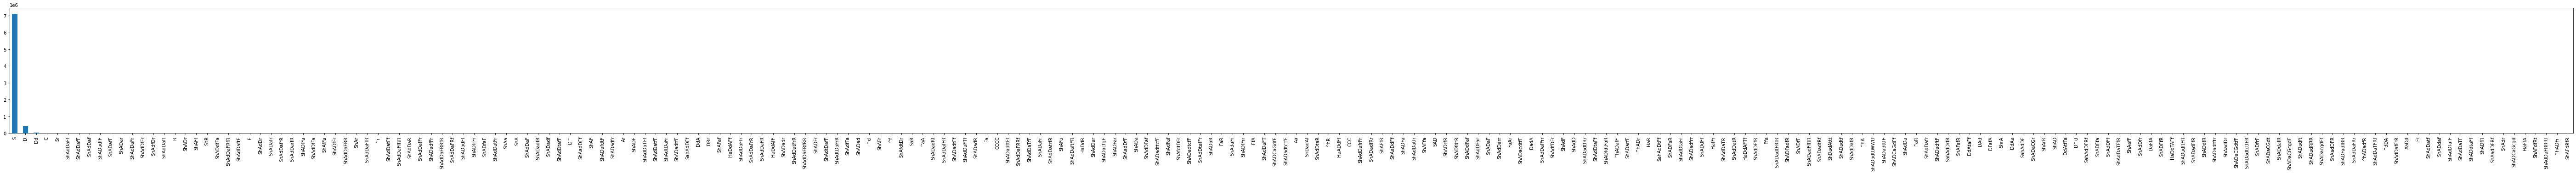

In [ ]:
plt.figure(figsize=(100,5))
data['history'].value_counts().plot(kind='bar')
plt.show()

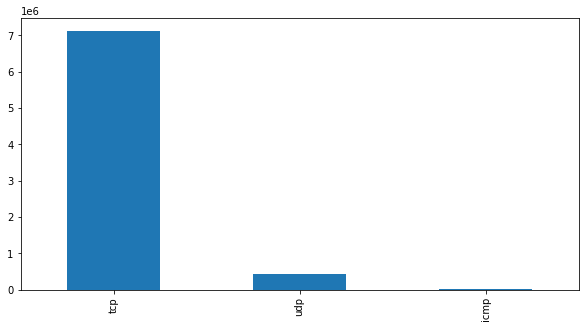

In [ ]:
plt.figure(figsize=(10,5))
data['proto'].value_counts().plot(kind='bar')
plt.show()

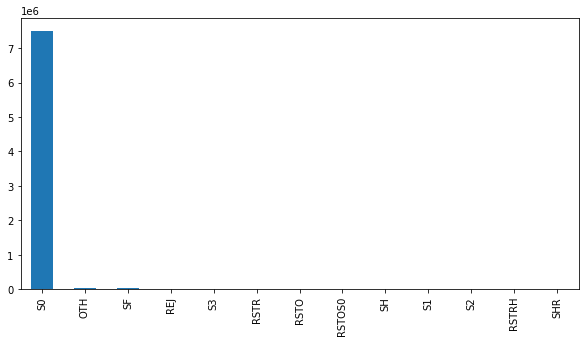

In [ ]:
plt.figure(figsize=(10,5))
data['conn_state'].value_counts().plot(kind='bar')
plt.show()

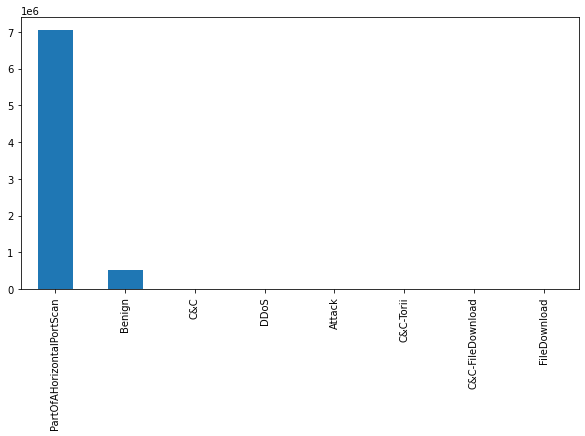

In [ ]:
plt.figure(figsize=(10,5))
data['detailed-label'].value_counts().plot(kind='bar')
plt.show()

# Visualizing the data all in one:

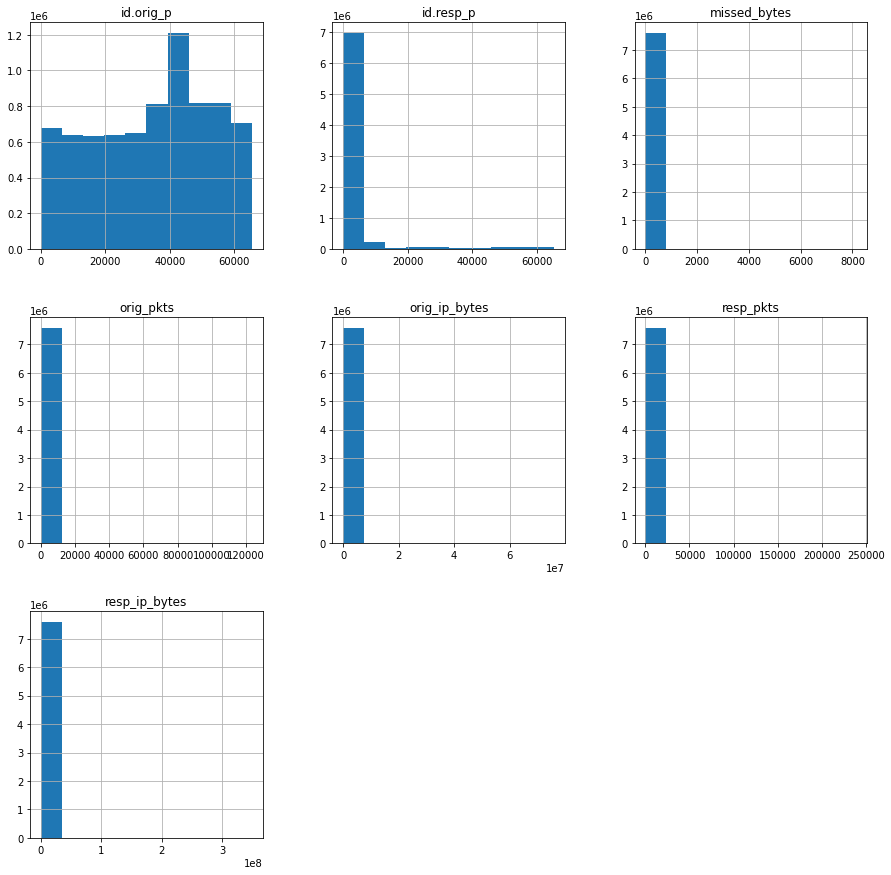

In [ ]:
data.hist(figsize=(15,15))
plt.show()

#Encoding

In [ ]:
training_columns = list(data.columns)
training_columns

['id.orig_h',
 'id.orig_p',
 'id.resp_h',
 'id.resp_p',
 'proto',
 'conn_state',
 'missed_bytes',
 'history',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'tunnel_parents',
 'detailed-label']

In [ ]:
# Categorical Columns:
data.loc[:,[ 'id.orig_h', 'id.resp_h', 'proto','conn_state', 'history'] ]

,id.orig_h,id.resp_h,proto,conn_state,history
uid,,,,,
CUg3u41D8SwgQw1Job,0.0.0.0,255.255.255.255,udp,S0,D
CUpk9Y381SJuOHyK2d,255.255.255.255,192.168.1.1,udp,SHR,^d
CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,ff02::fb,udp,S0,D
C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,ff02::fb,udp,S0,D
CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,ff02::fb,udp,S0,D
...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,192.168.1.197,82.113.53.40,udp,S0,D
CF56fv3yDg2vRnegKa,192.168.1.197,89.221.214.130,udp,SF,Dd
Ccvd9l4NjDPEkD1nRd,192.168.1.197,81.2.248.189,udp,SF,Dd


In [ ]:
print('Total Categories Present in id.Orig_h:',len(data['id.orig_h'].value_counts()))
orig_h_value_counts = data['id.orig_h'].value_counts()
orig_h_value_counts

Total Categories Present in id.Orig_h: 18171


192.168.100.111    6375659
192.168.100.103     994268
192.168.2.5         154886
192.168.1.195        23144
192.168.100.113      13685
                    ...   
14.93.130.144            1
188.14.19.203            1
172.2.28.185             1
4.14.114.46              1
172.125.4.1              1
Name: id.orig_h, Length: 18171, dtype: int64

In [ ]:
print('Total Categories Present in id.resp_h:',len(data['id.resp_h'].value_counts()))
resp_h_value_counts = data['id.resp_h'].value_counts()
resp_h_value_counts

Total Categories Present in id.resp_h: 5879170


200.168.87.203     23295
192.168.100.103    17689
123.59.209.185     14260
185.244.25.235      6771
147.231.100.5       6719
                   ...  
120.21.184.132         1
98.122.146.215         1
210.142.100.213        1
186.140.122.253        1
32.180.41.235          1
Name: id.resp_h, Length: 5879170, dtype: int64

In [ ]:
print('Total Categories Present in proto:',len(data['proto'].value_counts()))
proto_value_counts = data['proto'].value_counts()
proto_value_counts

Total Categories Present in proto: 3


tcp     7129790
udp      438355
icmp      21424
Name: proto, dtype: int64

In [ ]:
print('Total Categories Present in conn_state:',len(data['conn_state'].value_counts()))
conn_state_value_counts = data['conn_state'].value_counts()
conn_state_value_counts

Total Categories Present in conn_state: 13


S0        7506011
OTH         35720
SF          31822
REJ         10738
S3           2484
RSTR         1808
RSTO          373
RSTOS0        201
SH            143
S1             90
S2             85
RSTRH          79
SHR            15
Name: conn_state, dtype: int64

In [ ]:
print('Total Categories Present in history:',len(data['history'].value_counts()))
history_value_counts = data['history'].value_counts()
history_value_counts

Total Categories Present in history: 240


S            7106976
D             420434
Dd             17891
C              14252
Sr             10737
              ...   
ShAdDafR           1
ShAdDFf            1
ShADarfF           1
ShAdDtaFf          1
ShADdafR           1
Name: history, Length: 240, dtype: int64

In [ ]:
print('Total Categories Present in tunnel_parents:',len(data['tunnel_parents'].value_counts()))
tunnel_parents_value_counts = data['tunnel_parents'].value_counts()
tunnel_parents_value_counts

Total Categories Present in tunnel_parents: 1


(empty)    7589569
Name: tunnel_parents, dtype: int64

In [ ]:
print('Total Categories Present in detailed-label:',len(data['detailed-label'].value_counts()))
detailed_label_value_counts = data['detailed-label'].value_counts()
detailed_label_value_counts

Total Categories Present in detailed-label: 8


PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
Name: detailed-label, dtype: int64

In [ ]:
proto_dummies = pd.get_dummies(data['proto'],drop_first=True, prefix='proto')
proto_dummies

,proto_tcp,proto_udp
uid,,
CUg3u41D8SwgQw1Job,0,1
CUpk9Y381SJuOHyK2d,0,1
CC5CQA3Ptzma7a0by4,0,1
C3sgcmfvNzjNoY0Kd,0,1
CJVaCgoBTEsu0jjDi,0,1
...,...,...
Cg18Jr15pQhdJUELL4,0,1
CF56fv3yDg2vRnegKa,0,1
Ccvd9l4NjDPEkD1nRd,0,1


In [ ]:
conn_state_dummies = pd.get_dummies(data['conn_state'],drop_first=True, prefix = 'conn_state')
conn_state_dummies

,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,0,0,0,0,0,1,0,0,0,0,0,0
CF56fv3yDg2vRnegKa,0,0,0,0,0,0,0,0,0,1,0,0
Ccvd9l4NjDPEkD1nRd,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_history = OrdinalEncoder()
history_encoded = encoder_history.fit_transform(pd.DataFrame(data['history']))
history_encoded = pd.DataFrame(history_encoded)
history_encoded

,0
0,6.0
1,230.0
2,6.0
3,6.0
4,6.0
...,...
7589564,6.0
7589565,14.0
7589566,14.0
7589567,16.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_orig_h = OrdinalEncoder()
orig_h_encoded = encoder_orig_h.fit_transform(pd.DataFrame(data['id.orig_h']))
orig_h_encoded = pd.DataFrame(orig_h_encoded)
orig_h_encoded

,0
0,0.0
1,11571.0
2,18166.0
3,18166.0
4,18165.0
...,...
7589564,7614.0
7589565,7614.0
7589566,7614.0
7589567,6577.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_resp_h = OrdinalEncoder()
resp_h_encoded = encoder_resp_h.fit_transform(pd.DataFrame(data['id.resp_h']))
resp_h_encoded = pd.DataFrame(resp_h_encoded)
resp_h_encoded

,0
0,3871516.0
1,2836028.0
2,5879169.0
3,5879169.0
4,5879169.0
...,...
7589564,5351674.0
7589565,5559316.0
7589566,5333956.0
7589567,2836031.0


In [ ]:
data['id.orig_h'] = orig_h_encoded.values
data['id.resp_h'] = resp_h_encoded.values
data['history'] = history_encoded.values
data.drop(['proto',  'conn_state'],axis=1, inplace=True)
data = pd.concat([data, proto_dummies,conn_state_dummies], axis = 1)
data.head()


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0,68,3871516.0,67,0,6.0,16,9216,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,11571.0,68,2836028.0,67,0,230.0,0,0,13,4264,(empty),Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,18165.0,5353,5879169.0,5353,0,6.0,11,979,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = data.drop(['tunnel_parents', 'detailed-label'], axis=1)
y = data[['detailed-label']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7589569 entries, CUg3u41D8SwgQw1Job to Cb4VXV3tOHGjcsI0cf
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id.orig_h          float64
 1   id.orig_p          int64  
 2   id.resp_h          float64
 3   id.resp_p          int64  
 4   missed_bytes       int64  
 5   history            float64
 6   orig_pkts          int64  
 7   orig_ip_bytes      int64  
 8   resp_pkts          int64  
 9   resp_ip_bytes      int64  
 10  proto_tcp          uint8  
 11  proto_udp          uint8  
 12  conn_state_REJ     uint8  
 13  conn_state_RSTO    uint8  
 14  conn_state_RSTOS0  uint8  
 15  conn_state_RSTR    uint8  
 16  conn_state_RSTRH   uint8  
 17  conn_state_S0      uint8  
 18  conn_state_S1      uint8  
 19  conn_state_S2      uint8  
 20  conn_state_S3      uint8  
 21  conn_state_SF      uint8  
 22  conn_state_SH      uint8  
 23  conn_state_SHR     uint8  
dtypes: float64(3), int64(7), ui

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7589569 entries, CUg3u41D8SwgQw1Job to Cb4VXV3tOHGjcsI0cf
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   detailed-label  object
dtypes: object(1)
memory usage: 115.8+ MB


In [ ]:
y.value_counts()

detailed-label           
PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_y = OrdinalEncoder()
y_encoded = encoder_y.fit_transform(pd.DataFrame(y))
y_encoded = pd.DataFrame(y_encoded)
y_encoded.index = y.index
y_encoded.columns= ['detailed-label']
y_encoded

,detailed-label
uid,
CUg3u41D8SwgQw1Job,1.0
CUpk9Y381SJuOHyK2d,1.0
CC5CQA3Ptzma7a0by4,1.0
C3sgcmfvNzjNoY0Kd,1.0
CJVaCgoBTEsu0jjDi,1.0
...,...
Cg18Jr15pQhdJUELL4,1.0
CF56fv3yDg2vRnegKa,1.0
Ccvd9l4NjDPEkD1nRd,1.0


In [ ]:
data_encoded = pd.concat([X,y_encoded],axis=1)
data_encoded

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,detailed-label
uid,,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0,68,3871516.0,67,0,6.0,16,9216,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CUpk9Y381SJuOHyK2d,11571.0,68,2836028.0,67,0,230.0,0,0,13,4264,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0
CC5CQA3Ptzma7a0by4,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
C3sgcmfvNzjNoY0Kd,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CJVaCgoBTEsu0jjDi,18165.0,5353,5879169.0,5353,0,6.0,11,979,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,7614.0,123,5351674.0,123,0,6.0,1,76,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CF56fv3yDg2vRnegKa,7614.0,123,5559316.0,123,0,14.0,1,76,1,76,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
Ccvd9l4NjDPEkD1nRd,7614.0,123,5333956.0,123,0,14.0,1,76,1,76,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0


#Feature Selection

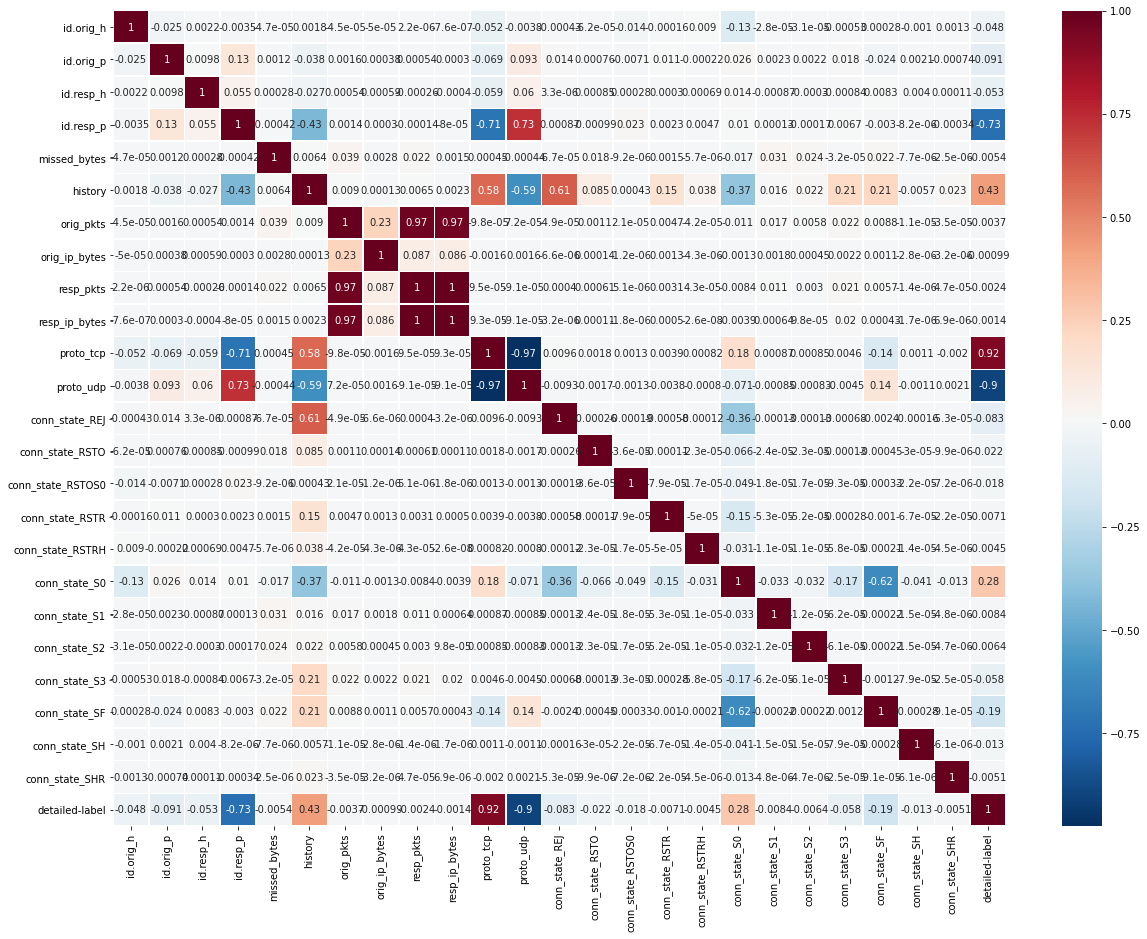

In [ ]:
corr_data = data_encoded.corr(method='pearson')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))

sns.heatmap(corr_data, 
            xticklabels=corr_data.columns,
            yticklabels=corr_data.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
help(chi2)

Help on function chi2 in module sklearn.feature_selection._univariate_selection:

chi2(X, y)
    Compute chi-squared stats between each non-negative feature and class.
    
    This score can be used to select the n_features features with the
    highest values for the test chi-squared statistic from X, which must
    contain only non-negative features such as booleans or frequencies
    (e.g., term counts in document classification), relative to the classes.
    
    Recall that the chi-square test measures dependence between stochastic
    variables, so using this function "weeds out" the features that are the
    most likely to be independent of class and therefore irrelevant for
    classification.
    
    Read more in the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Sample vectors.
    
    y : array-like of shape (n_samples,)
        Target vector (class labels).


In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y_encoded)
pd.DataFrame(chi_scores)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,187045.847798,9.775831e+08,4.891797e+10,1.620942e+11,2.543802e+09,1.027019e+07,3.546543e+07,7.862066e+09,5.804042e+08,7.440455e+09,408674.955054,6.041975e+06,54853.12519,3821.720177,2511.179493,1.127009e+03,1.649884e+02,24295.861246,12019.406039,3292.917205,515327.57032,1.553673e+06,1.374479e+03,2.067858e+02
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,4.272710e-239,2.856984e-32,0.000000,0.000000,0.000000,0.00000,0.000000e+00,1.283946e-292,4.189976e-41


In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

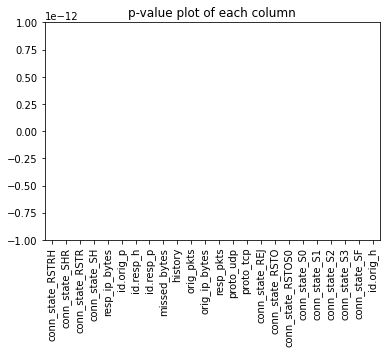

In [ ]:
plt.title('p-value plot of each column')
p_values.plot.bar()
plt.show()

In [ ]:
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)

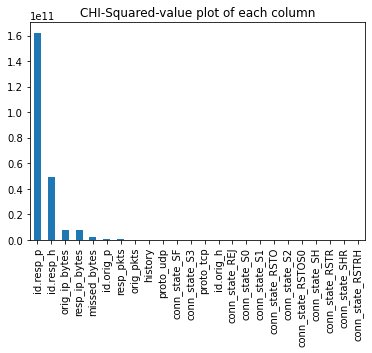

In [ ]:
plt.title('CHI-Squared-value plot of each column')
chi_values.plot.bar()
plt.show()

In [ ]:
feature_importance = list(chi_values[:5].index)
feature_importance

['id.resp_p', 'id.resp_h', 'orig_ip_bytes', 'resp_ip_bytes', 'missed_bytes']

In [ ]:
data.drop(['tunnel_parents'],axis=1, inplace=True)

In [ ]:
data.to_csv('IoT-23-trainable_data.csv')

In [ ]:
import shutil
shutil.move('/content/IoT-23-trainable_data.csv', '/content/drive/MyDrive')

'/content/drive/MyDrive/IoT-23-trainable_data.csv'

# Training the data:

In [ ]:
import pandas as pd
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()

,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
Name: detailed-label, dtype: int64

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y = data[['detailed-label']]

In [ ]:
help(SMOTE())

Extra efforts to make balanced class.. Though not suitable but did anyway to see results

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 },k_neighbors=1, random_state=1)

steps = [('u', under),('o', over) ]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
y_test.columns = ['detailed-label']

#Neural Network Modeling 

1) MLP
                                                       
A multilayer perceptron is a class of feedforward artificial neural network (ANN)

In [ ]:
MLP_classifier = MLPClassifier(random_state=1, max_iter=10)
MLP_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Train predictions
train_pred = MLP_classifier.score(X_train,y_train)

In [ ]:
# Prediction on unknown Test data
y_pred=MLP_classifier.predict(X_test)

#Calculating the scores and metrics

1) Accuracy Score

In [ ]:
print('MLP Classifier Training accuracy score:',100*train_pred.round(2),'%')
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('MLP Classifier Test Accuracy Score:',test_accuracy,'%')

MLP Classifier Training accuracy score: 91.0 %
MLP Classifier Test Accuracy Score: 91.0 %


2) Classification Report

In [ ]:
# classification report
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

                           precision    recall  f1-score   support

                   Attack       0.99      1.00      1.00     20000
                   Benign       0.95      0.85      0.90     20000
                      C&C       0.88      1.00      0.94     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.96      0.63      0.76     20000
                     DDoS       0.97      0.99      0.98     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.61      0.79      0.69     20000

                 accuracy                           0.91    160000
                macro avg       0.92      0.91      0.91    160000
             weighted avg       0.92      0.91      0.91    160000

[[19972     0    19     0     0     1     0     8]
 [   66 16988   484     0    24    24     0  2414]
 [    6     3 19982     0     0     0     0     9]
 [    0     0     0 20000     0     0   

3) F1 Score & Precision

In [ ]:
# Results DataFrame
MLP_results = pd.DataFrame({'Test Accuracy(%)': test_accuracy, 'Train Accuracy(%)':100*train_pred.round(2),
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'Test Precision': test_precision},index=[0])

MLP_results

,Test Accuracy(%),Train Accuracy(%),Test Recall,Test F1 Score,Test Precision
0,91.0,91.0,0.906531,0.906937,0.920679


# Trying to improve MLP scores

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y = data[['detailed-label']]

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 },k_neighbors=1, random_state=1)

steps = [('u', under),('o', over) ]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)


In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

detailed-label           
PartOfAHorizontalPortScan    20000
FileDownload                 20000
DDoS                         20000
C&C-Torii                    20000
C&C-FileDownload             20000
C&C                          20000
Benign                       20000
Attack                       20000
dtype: int64

In [ ]:
y_train.value_counts()

detailed-label           
PartOfAHorizontalPortScan    80000
FileDownload                 80000
DDoS                         80000
C&C-Torii                    80000
C&C-FileDownload             80000
C&C                          80000
Benign                       80000
Attack                       80000
dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter=10)

parameter_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV
MLP_search = GridSearchCV(MLP_classifier, parameter_grid, n_jobs=-1, cv=5)
MLP_search.fit(X_train, y_train) 


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
means = MLP_search.cv_results_['mean_test_score']
stds = MLP_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, MLP_search.cv_results_['params']):
    print("{0}% (+/-{1}%) for {2}".format(np.round(100*(mean), 2), np.round(100*std,2), params))

17.61% (+/-6.12%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
25.25% (+/-0.19%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
17.77% (+/-6.26%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
25.45% (+/-7.81%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
20.05% (+/-6.11%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
28.43% (+/-5.7%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
15.17% (+/-4.88%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
30.88% (+/-

In [ ]:
# Train predictions
train_pred = MLP_search.score(X_train,y_train)

In [ ]:
# Prediction on unknown Test data
y_pred=MLP_search.predict(X_test)

In [ ]:
print('MLP Classifier Training accuracy score:',100*train_pred.round(2),'%')
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('MLP Classifier Test Accuracy Score:',test_accuracy,'%')
print('MLP Cross Validation Accuracy:', 100*(MLP_search.best_score_).round(2),'%')


MLP Classifier Training accuracy score: 86.0 %
MLP Classifier Test Accuracy Score: 86.0 %
MLP Cross Validation Accuracy: 87.0 %


In [ ]:
# classification report
print('Classification Report')
print(metrics.classification_report(y_test,y_pred))

print('Confusion Matrix')
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)


Classification Report
                           precision    recall  f1-score   support

                   Attack       0.99      1.00      0.99     20000
                   Benign       0.79      0.93      0.85     20000
                      C&C       0.91      0.29      0.43     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.89      1.00      0.94     20000
                     DDoS       0.72      0.99      0.83     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.68      0.68      0.68     20000

                 accuracy                           0.86    160000
                macro avg       0.87      0.86      0.84    160000
             weighted avg       0.87      0.86      0.84    160000

Confusion Matrix
[[19987     0     0     0     1     2     0    10]
 [  126 18566   323     0   230    21     0   734]
 [   14  3258  5713     0     4  5504     0  5507]
 

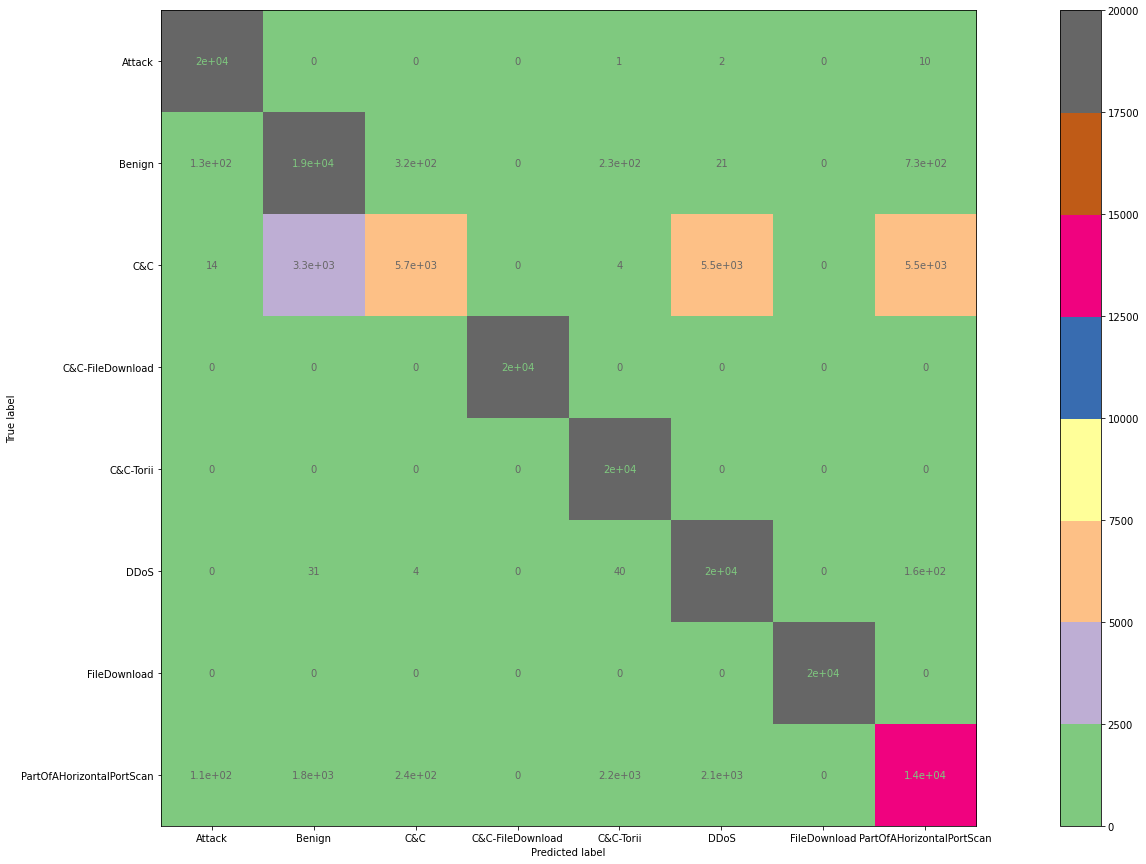

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(30, 15))
plot_confusion_matrix(MLP_search,X_test,y_test, ax=ax, cmap='Accent')
plt.show()

In [ ]:

test_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
test_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
test_f1_score = metrics.f1_score(y_test, y_pred, average = 'macro')

In [ ]:
# Results DataFrame
MLP_results = pd.DataFrame({'Test Accuracy(%)': test_accuracy, 'Train Accuracy(%)':100*train_pred.round(2),
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'Test Precision': test_precision},index=[0])

MLP_results

,Test Accuracy(%),Train Accuracy(%),Test Recall,Test F1 Score,Test Precision
0,86.0,86.0,0.859731,0.84143,0.87145


#Preprocess for CNN

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y 

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    20000
          0.0  1.0  0.0  0.0  0.0  0.0    20000
               0.0  1.0  0.0  0.0  0.0    20000
                    0.0  1.0  0.0  0.0    20000
                         0.0  1.0  0.0    20000
                              0.0  1.0    20000
dtype: int64

In [ ]:
y_train.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    80000
          0.0  1.0  0.0  0.0  0.0  0.0    80000
               0.0  1.0  0.0  0.0  0.0    80000
                    0.0  1.0  0.0  0.0    80000
                         0.0  1.0  0.0    80000
                              0.0  1.0    80000
dtype: int64

#Unbalanced CNN

In [ ]:
x_train = X_train.to_numpy()
x_test  = X_test.to_numpy()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23)
(160000, 23)
(640000, 8)
(160000, 8)


In [ ]:
x_train=x_train.reshape(640000, 23, 1)
x_test=x_test.reshape(160000, 23, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23, 1)
(160000, 23, 1)
(640000, 8)
(160000, 8)


In [ ]:
model=Sequential()
model.add(Conv1D(16,(2),activation='relu', input_shape=x_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(32,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(8,activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

Epochs 50

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
20000/20000 [==============================] - 72s 4ms/step - loss: 1.2634 - accuracy: 0.4396 - val_loss: 1.2345 - val_accuracy: 0.4187
Epoch 2/50
20000/20000 [==============================] - 69s 3ms/step - loss: 0.8101 - accuracy: 0.6721 - val_loss: 0.8870 - val_accuracy: 0.7894
Epoch 3/50
20000/20000 [==============================] - 68s 3ms/step - loss: 0.7474 - accuracy: 0.7029 - val_loss: 2.2043 - val_accuracy: 0.4148
Epoch 4/50
20000/20000 [==============================] - 69s 3ms/step - loss: 0.7322 - accuracy: 0.7100 - val_loss: 0.9643 - val_accuracy: 0.8223
Epoch 5/50
20000/20000 [==============================] - 69s 3ms/step - loss: 0.7202 - accuracy: 0.7151 - val_loss: 1.5064 - val_accuracy: 0.4322
Epoch 6/50
20000/20000 [==============================] - 69s 3ms/step - loss: 0.7114 - accuracy: 0.7199 - val_loss: 1.4724 - val_accuracy: 0.4528
Epoch 7/50
20000/20000 [==============================] - 68s 3ms/step - loss: 0.7146 - accuracy: 0.7196 - val_loss: 1

#Balanced

Loading Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving model.h5 to model.h5
Saving model.yaml to model.yaml


{'model.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xffp\xd1\x01\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x06\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00\x08\x02\x00\x00\x00\x00\x00\x00TREE\x00\x00\x02\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\xe8\xc5\x01\x00\x00\x00\x00\x00\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
csvloc = '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()

In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
Name: detailed-label, dtype: int64

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y_first = data[['detailed-label']]

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 }, k_neighbors=1, random_state=1)

steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y_first = pipeline.fit_resample(X, y_first)


FIT

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_first)
encoded_Y = encoder.transform(y_first)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y


In [ ]:
decode = pd.DataFrame(encoded_Y, y_first).reset_index()
decode.value_counts()

index                      0
PartOfAHorizontalPortScan  7    100000
FileDownload               6    100000
DDoS                       5    100000
C&C-Torii                  4    100000
C&C-FileDownload           3    100000
C&C                        2    100000
Benign                     1    100000
Attack                     0    100000
dtype: int64

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    20000
          0.0  1.0  0.0  0.0  0.0  0.0    20000
               0.0  1.0  0.0  0.0  0.0    20000
                    0.0  1.0  0.0  0.0    20000
                         0.0  1.0  0.0    20000
                              0.0  1.0    20000
dtype: int64

In [ ]:
y_train.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    80000
          0.0  1.0  0.0  0.0  0.0  0.0    80000
               0.0  1.0  0.0  0.0  0.0    80000
                    0.0  1.0  0.0  0.0    80000
                         0.0  1.0  0.0    80000
                              0.0  1.0    80000
dtype: int64

CNN

In [ ]:
x_train = X_train.to_numpy()
x_test  = X_test.to_numpy()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23)
(160000, 23)
(640000, 8)
(160000, 8)


In [ ]:
x_train=x_train.reshape(640000, 23, 1) # make sure above listed size matches
x_test=x_test.reshape(160000, 23, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23, 1)
(160000, 23, 1)
(640000, 8)
(160000, 8)


Epochs 100

In [ ]:
model=Sequential()
model.add(Conv1D(16,(2),activation='relu', input_shape=x_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8,activation='sigmoid'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
20000/20000 [==============================] - 73s 4ms/step - loss: 0.7075 - accuracy: 0.6620 - val_loss: 0.4552 - val_accuracy: 0.7520
Epoch 2/100
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4831 - accuracy: 0.7363 - val_loss: 0.5059 - val_accuracy: 0.6569
Epoch 3/100
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4660 - accuracy: 0.7467 - val_loss: 0.4349 - val_accuracy: 0.7871
Epoch 4/100
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4447 - accuracy: 0.7748 - val_loss: 0.7561 - val_accuracy: 0.6606
Epoch 5/100
20000/20000 [==============================] - 70s 4ms/step - loss: 0.4256 - accuracy: 0.7926 - val_loss: 0.5312 - val_accuracy: 0.7568
Epoch 6/100
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4161 - accuracy: 0.7988 - val_loss: 0.5712 - val_accuracy: 0.7635
Epoch 7/100
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3911 - accuracy: 0.8170 - val_

#Graphs

In [ ]:
history

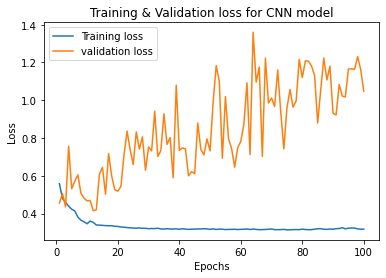

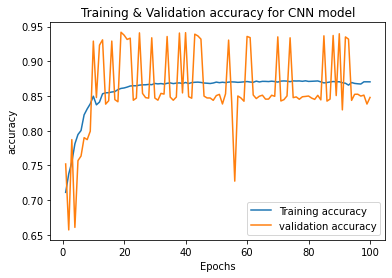

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


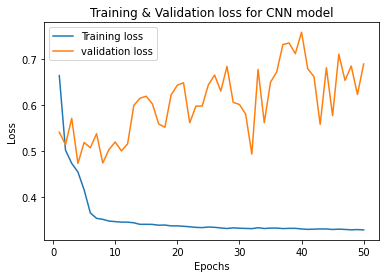

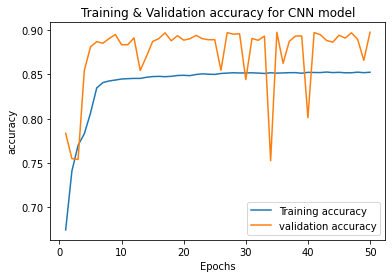

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 51) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 51) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


Saving Model to Disk:

In [ ]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("balanced_model2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("balanced_model2.h5")
print("Saved model to disk")

Saved model to disk


 Loading Model From Disk:

In [ ]:
# load YAML and create model
yaml_file = open('balanced_model2.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("balanced_model2.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6913 - accuracy: 0.8467
accuracy: 84.79%


# Model Evaluation

In [ ]:
y_test_pred = pd.DataFrame(loaded_model.predict(x_test))

In [ ]:
test_pred = loaded_model.predict(x_test) 

test_pred = pd.DataFrame(np.argmax(test_pred, axis=1))
test_label =  pd.DataFrame(np.argmax(np.array(y_test),axis = 1))


In [ ]:
# Decoding predicted test labels back from label encoded values.
test_pred.loc[test_pred[0]==7,0]= 'PartOfAHorizontalPortScan'
test_pred.loc[test_pred[0]==1,0]= 'Benign'
test_pred.loc[test_pred[0]==2,0]= 'C&C'
test_pred.loc[test_pred[0]==5,0]= 'DDoS'
test_pred.loc[test_pred[0]==0,0]= 'Attack'
test_pred.loc[test_pred[0]==4,0]= 'C&C-Torii'
test_pred.loc[test_pred[0]==3,0]= 'C&C-FileDownload'
test_pred.loc[test_pred[0]==6,0]= 'FileDownload'

# Decoding Actual test labels back from label encoded values.
test_label.loc[test_label[0]==7,0]= 'PartOfAHorizontalPortScan'
test_label.loc[test_label[0]==1,0]= 'Benign'
test_label.loc[test_label[0]==2,0]= 'C&C'
test_label.loc[test_label[0]==5,0]= 'DDoS'
test_label.loc[test_label[0]==0,0]= 'Attack'
test_label.loc[test_label[0]==4,0]= 'C&C-Torii'
test_label.loc[test_label[0]==3,0]= 'C&C-FileDownload'
test_label.loc[test_label[0]==6,0]= 'FileDownload'


In [ ]:

test_accuracy = metrics.accuracy_score(test_label, test_pred)
print('Train Accuracy:')
print(round(100*score[1],2))
print('Test Accuracy:')
print(100*test_accuracy.round(2))


Train Accuracy:
89.76
Test Accuracy:
90.0


In [ ]:
cm = metrics.confusion_matrix(test_label, test_pred)
cm

array([[20000,     0,     0,     0,     0,     0,     0,     0],
       [  301, 19081,   429,     2,    64,     0,     0,   123],
       [    2,    12, 19984,     0,     2,     0,     0,     0],
       [    0,     0,     0, 20000,     0,     0,     0,     0],
       [    0,     0,     0,     0, 20000,     0,     0,     0],
       [    2,     0,     0,     0,   165, 19833,     0,     0],
       [    0,     0,     0,     0,     0,     0, 20000,     0],
       [   46,    69, 12164,     1,  3293,     0,     0,  4427]])

In [ ]:
test_pred.value_counts()

C&C                          32577
C&C-Torii                    23524
Attack                       20351
C&C-FileDownload             20003
FileDownload                 20000
DDoS                         19833
Benign                       19162
PartOfAHorizontalPortScan     4550
dtype: int64

In [ ]:
test_label.value_counts()

FileDownload                 20000
Benign                       20000
DDoS                         20000
C&C-Torii                    20000
C&C                          20000
C&C-FileDownload             20000
Attack                       20000
PartOfAHorizontalPortScan    20000
Name: 0, dtype: int64

Confusion matrix, without normalization


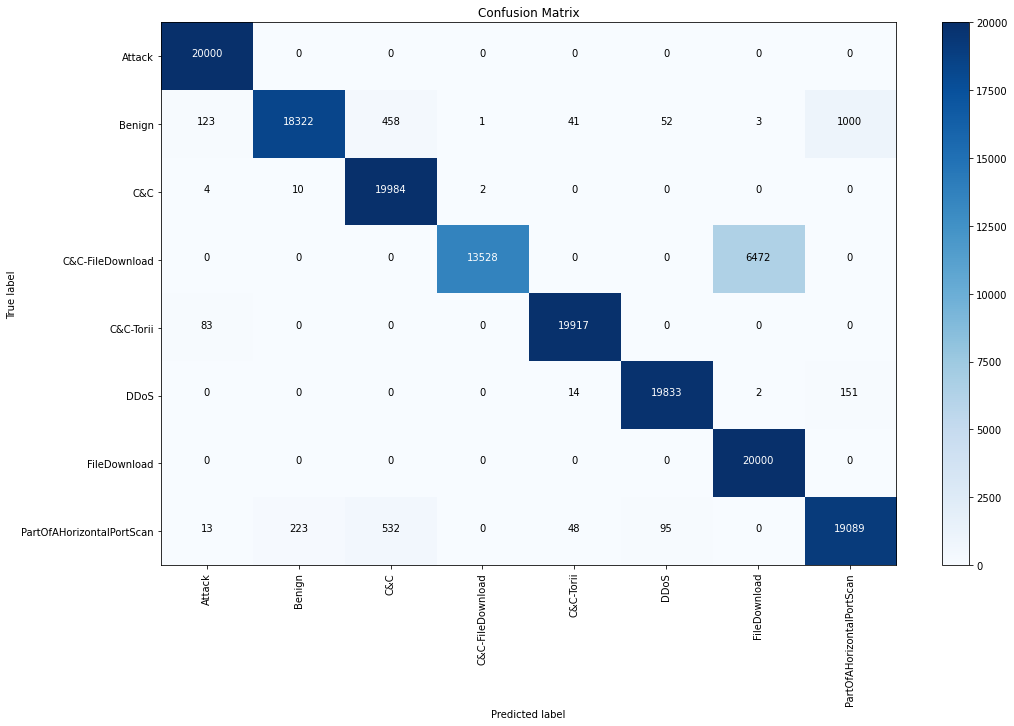

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap='Accent', aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm=cm, classes=['Attack','Benign','C&C', 'C&C-FileDownload','C&C-Torii','DDoS','FileDownload','PartOfAHorizontalPortScan'], title='Confusion Matrix')

In [ ]:
print(metrics.classification_report(test_label, test_pred))

                           precision    recall  f1-score   support

                   Attack       0.99      1.00      0.99     20000
                   Benign       0.99      0.92      0.95     20000
                      C&C       0.95      1.00      0.98     20000
         C&C-FileDownload       1.00      0.68      0.81     20000
               C&C-Torii        0.99      1.00      1.00     20000
                     DDoS       0.99      0.99      0.99     20000
             FileDownload       0.76      1.00      0.86     20000
PartOfAHorizontalPortScan       0.94      0.95      0.95     20000

                 accuracy                           0.94    160000
                macro avg       0.95      0.94      0.94    160000
             weighted avg       0.95      0.94      0.94    160000



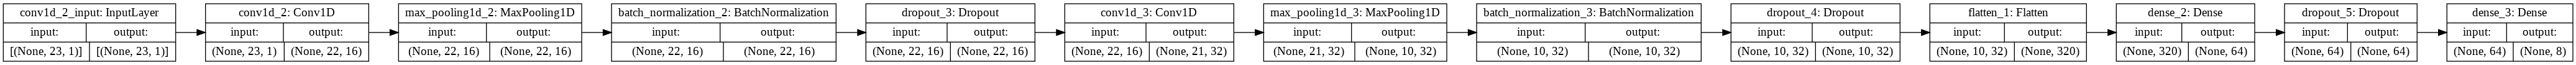

In [ ]:
import keras
keras.utils.plot_model(model, show_shapes=True, rankdir='LR')


#Without balancing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csvloc = '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()

,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
Name: detailed-label, dtype: int64

In [ ]:

X = data.drop(['detailed-label'], axis=1)
y_first = data[['detailed-label']]

FIT

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_first)
encoded_Y = encoder.transform(y_first)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y

In [ ]:
decode = pd.DataFrame(encoded_Y, y_first).reset_index()
decode.value_counts()

index                         0
(PartOfAHorizontalPortScan,)  7    7040929
(Benign,)                     1     513304
(C&C,)                        2      14944
(DDoS,)                       5      14394
(Attack,)                     0       5962
(C&C-Torii,)                  4         30
(FileDownload,)               6          3
(C&C-FileDownload,)           3          3
dtype: int64

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

0    1    2    3    4    5    6    7  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    1408186
     1.0  0.0  0.0  0.0  0.0  0.0  0.0     102661
     0.0  1.0  0.0  0.0  0.0  0.0  0.0       2989
          0.0  0.0  0.0  1.0  0.0  0.0       2879
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1192
0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0          6
               1.0  0.0  0.0  0.0  0.0          1
dtype: int64

In [ ]:
y_train.value_counts()

0    1    2    3    4    5    6    7  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    5632743
     1.0  0.0  0.0  0.0  0.0  0.0  0.0     410643
     0.0  1.0  0.0  0.0  0.0  0.0  0.0      11955
          0.0  0.0  0.0  1.0  0.0  0.0      11515
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       4770
0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0         24
                    0.0  0.0  1.0  0.0          3
               1.0  0.0  0.0  0.0  0.0          2
dtype: int64

CNN

In [ ]:
x_train = X_train.to_numpy()
x_test  = X_test.to_numpy()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6071655, 23)
(1517914, 23)
(6071655, 8)
(1517914, 8)


In [ ]:
x_train=x_train.reshape(6071655, 23, 1) # make sure above listed size matches
x_test=x_test.reshape(1517914, 23, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6071655, 23, 1)
(1517914, 23, 1)
(6071655, 8)
(1517914, 8)


In [ ]:
model=Sequential()
model.add(Conv1D(16,(2),activation='relu', input_shape=x_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8,activation='sigmoid'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
189740/189740 [==============================] - 641s 3ms/step - loss: 0.1053 - accuracy: 0.9742 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 2/10
189740/189740 [==============================] - 624s 3ms/step - loss: 0.0405 - accuracy: 0.9896 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 3/10
189740/189740 [==============================] - 622s 3ms/step - loss: 0.0380 - accuracy: 0.9902 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 4/10
189740/189740 [==============================] - 629s 3ms/step - loss: 0.0388 - accuracy: 0.9900 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 5/10
189740/189740 [==============================] - 632s 3ms/step - loss: 0.0438 - accuracy: 0.9890 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 6/10
189740/189740 [==============================] - 615s 3ms/step - loss: 0.0430 - accuracy: 0.9891 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 7/10
189740/189740 [==============================] - 625s 3ms/step - loss: 0.0389 - accuracy:

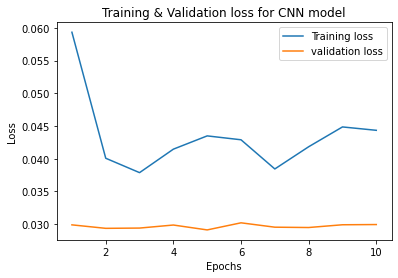

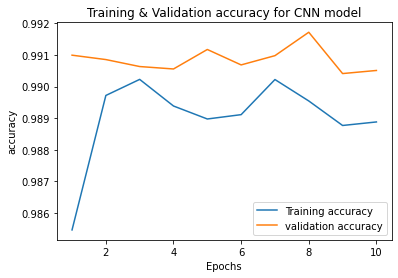

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 11) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, 11) 
plt.plot(epochs, accuracy, label = "Training accuracy") 
plt.plot(epochs, val_accuracy, label = "validation accuracy")
plt.title('Training & Validation accuracy for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


In [ ]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
from google.colab import files
files.upload()

Saving model.h5 to model.h5
Saving model.yaml to model.yaml


{'model.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xffp\xd1\x01\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x06\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00\x08\x02\x00\x00\x00\x00\x00\x00TREE\x00\x00\x02\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\xe8\xc5\x01\x00\x00\x00\x00\x00\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
47435/47435 [==============================] - 70s 1ms/step - loss: 0.0294 - accuracy: 0.9904
accuracy: 99.05%


In [ ]:
train_pred = loaded_model.predict(x_train) 

train_pred = pd.DataFrame(np.argmax(train_pred, axis=1))
train_label =  pd.DataFrame(np.argmax(np.array(y_train),axis = 1))


In [ ]:
train_label.loc[train_label[0]==0,0]='Attack'
train_label.loc[train_label[0]==1,0]='Benign'
train_label.loc[train_label[0]==2,0]='C&C'
train_label.loc[train_label[0]==3,0]='C&C-FileDownload'
train_label.loc[train_label[0]==4,0]='C&C-Torii'
train_label.loc[train_label[0]==5,0]='DDoS'
train_label.loc[train_label[0]==6,0]='FileDownload'
train_label.loc[train_label[0]==7,0]='PartOfAHorizontalPortScan'

train_pred.loc[train_pred[0]==0,0]='Attack'
train_pred.loc[train_pred[0]==1,0]='Benign'
train_pred.loc[train_pred[0]==2,0]='C&C'
train_pred.loc[train_pred[0]==3,0]='C&C-FileDownload'
train_pred.loc[train_pred[0]==4,0]='C&C-Torii'
train_pred.loc[train_pred[0]==5,0]='DDoS'
train_pred.loc[train_pred[0]==6,0]='FileDownload'
train_pred.loc[train_pred[0]==7,0]='PartOfAHorizontalPortScan'

In [ ]:
cm = metrics.confusion_matrix(train_label.values, train_pred.values)
cm

array([[      0,       0,       0,       0,       0,       0,       0,
           4770],
       [     42,  369798,       0,       0,       0,       0,       0,
          40803],
       [      0,    1256,       0,       0,       0,       0,       0,
          10699],
       [      0,       0,       0,       0,       0,       0,       0,
              2],
       [      0,       0,       0,       0,       0,       0,       0,
             24],
       [     44,       0,       0,       0,       0,   11410,       0,
             61],
       [      0,       0,       0,       0,       0,       0,       0,
              3],
       [ 470166,      59,       0,       0,       0,       0,       0,
        5162518]])

In [ ]:
print(metrics.classification_report(train_label, train_pred))

                           precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00      4770
                   Benign       1.00      0.90      0.95    410643
                      C&C       0.00      0.00      0.00     11955
         C&C-FileDownload       0.00      0.00      0.00         2
                C&C-Torii       0.00      0.00      0.00        24
                     DDoS       1.00      0.99      1.00     11515
             FileDownload       0.00      0.00      0.00         3
PartOfAHorizontalPortScan       0.99      0.92      0.95   5632743

                 accuracy                           0.91   6071655
                macro avg       0.37      0.35      0.36   6071655
             weighted avg       0.99      0.91      0.95   6071655



In [ ]:
pred = loaded_model.predict(x_test) 
test_pred = pd.DataFrame(np.argmax(pred, axis=1))
test_label =  pd.DataFrame(np.argmax(np.array(y_test),axis = 1))


7    1304499
0     117736
1      92829
5       2850
dtype: int64

7    1408186
1     102661
2       2989
5       2879
0       1192
4          6
3          1
dtype: int64

In [ ]:
test_label.loc[test_label[0]==0,0]='Attack'
test_label.loc[test_label[0]==1,0]='Benign'
test_label.loc[test_label[0]==2,0]='C&C'
test_label.loc[test_label[0]==3,0]='C&C-FileDownload'
test_label.loc[test_label[0]==4,0]='C&C-Torii'
test_label.loc[test_label[0]==5,0]='DDoS'
test_label.loc[test_label[0]==6,0]='FileDownload'
test_label.loc[test_label[0]==7,0]='PartOfAHorizontalPortScan'

In [ ]:
test_pred.loc[test_pred[0]==0,0]='Attack'
test_pred.loc[test_pred[0]==1,0]='Benign'
test_pred.loc[test_pred[0]==2,0]='C&C'
test_pred.loc[test_pred[0]==3,0]='C&C-FileDownload'
test_pred.loc[test_pred[0]==4,0]='C&C-Torii'
test_pred.loc[test_pred[0]==5,0]='DDoS'
test_pred.loc[test_pred[0]==6,0]='FileDownload'
test_pred.loc[test_pred[0]==7,0]='PartOfAHorizontalPortScan'

In [ ]:
test_pred.value_counts()

PartOfAHorizontalPortScan    1304499
Attack                        117736
Benign                         92829
DDoS                            2850
dtype: int64

In [ ]:
test_label.value_counts()

PartOfAHorizontalPortScan    1408186
Benign                        102661
C&C                             2989
DDoS                            2879
Attack                          1192
C&C-Torii                          6
C&C-FileDownload                   1
dtype: int64

In [ ]:
test_accuracy = metrics.accuracy_score(test_label, test_pred)
print('Test Accuracy:')
print(100*test_accuracy.round(2))

Test Accuracy:
91.0


In [ ]:
cm = metrics.confusion_matrix(test_label.values, test_pred.values)
cm

array([[      0,       0,       0,       0,       0,       0,    1192],
       [     12,   92482,       0,       0,       0,       0,   10167],
       [      0,     336,       0,       0,       0,       0,    2653],
       [      0,       0,       0,       0,       0,       0,       1],
       [      0,       0,       0,       0,       0,       0,       6],
       [      6,       0,       0,       0,       0,    2850,      23],
       [ 117718,      11,       0,       0,       0,       0, 1290457]])

Confusion matrix, without normalization


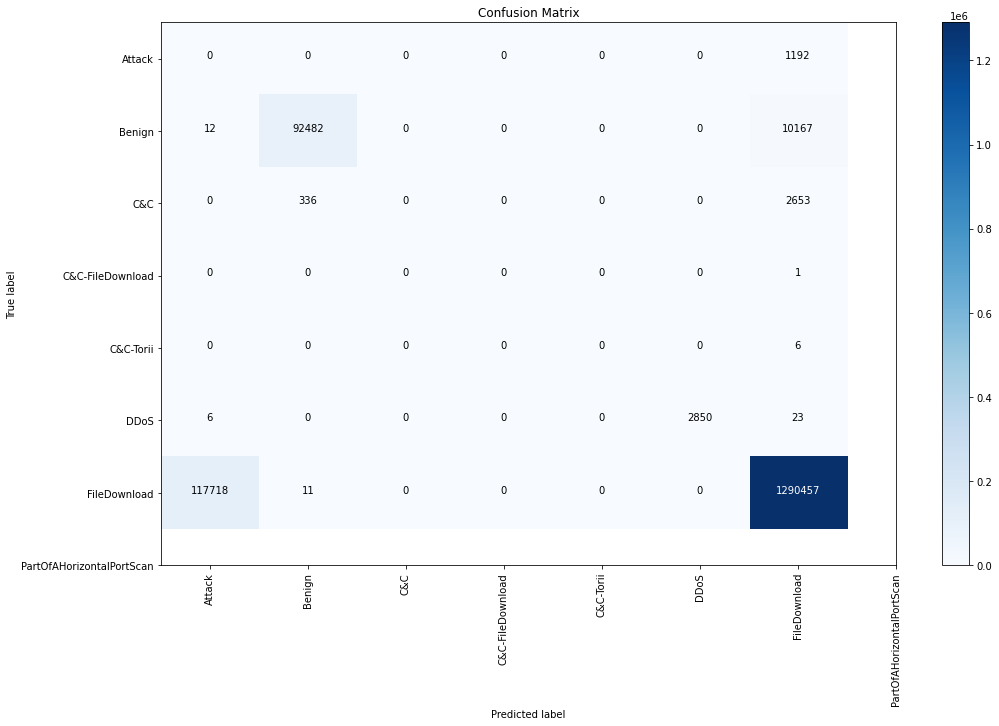

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm=cm, classes=['Attack','Benign','C&C', 'C&C-FileDownload','C&C-Torii','DDoS','FileDownload','PartOfAHorizontalPortScan'], title='Confusion Matrix')

In [ ]:
print(metrics.classification_report(test_label, test_pred))

                           precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00      1192
                   Benign       1.00      0.90      0.95    102661
                      C&C       0.00      0.00      0.00      2989
         C&C-FileDownload       0.00      0.00      0.00         1
                C&C-Torii       0.00      0.00      0.00         6
                     DDoS       1.00      0.99      0.99      2879
PartOfAHorizontalPortScan       0.99      0.92      0.95   1408186

                 accuracy                           0.91   1517914
                macro avg       0.43      0.40      0.41   1517914
             weighted avg       0.99      0.91      0.95   1517914



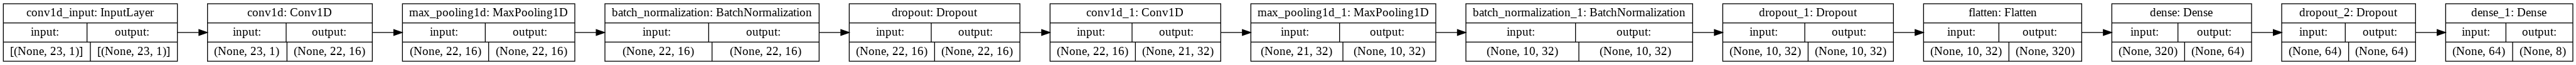

In [ ]:
import keras
keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

#LSTM

Training the data:

In [ ]:
#importing pandas and numpy, datetime
import pandas as pd
import numpy as np
from datetime import datetime

# visualization tools
import matplotlib.pyplot as plt

# Train Test Split
from sklearn.model_selection import train_test_split

# ML classifier, keras Models
from sklearn.neural_network import MLPClassifier
from keras.utils import np_utils
from keras.models import *
from keras.layers import *

# cross validation, lebelencoder and metrics libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

# Randomunder sampler, SMOTE, pipeline for treating class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csvloc = '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()

,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = data.drop(['detailed-label'], axis=1)
y_first = data[['detailed-label']]

Balancing

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 }, k_neighbors=1, random_state=1)

steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y_first = pipeline.fit_resample(X, y_first)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
C&C-FileDownload                   3
FileDownload                       3
Name: detailed-label, dtype: int64

ENCODEDFIT

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_first)
encoded_Y = encoder.transform(y_first)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y

In [ ]:
decode = pd.DataFrame(encoded_Y, y_first).reset_index()
decode.value_counts()

index                      0
PartOfAHorizontalPortScan  7    100000
FileDownload               6    100000
DDoS                       5    100000
C&C-Torii                  4    100000
C&C-FileDownload           3    100000
C&C                        2    100000
Benign                     1    100000
Attack                     0    100000
dtype: int64

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    20000
          0.0  1.0  0.0  0.0  0.0  0.0    20000
               0.0  1.0  0.0  0.0  0.0    20000
                    0.0  1.0  0.0  0.0    20000
                         0.0  1.0  0.0    20000
                              0.0  1.0    20000
dtype: int64

In [ ]:
y_train.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    80000
          0.0  1.0  0.0  0.0  0.0  0.0    80000
               0.0  1.0  0.0  0.0  0.0    80000
                    0.0  1.0  0.0  0.0    80000
                         0.0  1.0  0.0    80000
                              0.0  1.0    80000
dtype: int64

In [ ]:
x_train = X_train.to_numpy()
x_test  = X_test.to_numpy()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23)
(160000, 23)
(640000, 8)
(160000, 8)


In [ ]:
x_train=x_train.reshape(640000, 23, 1) # make sure above listed size matches
x_test=x_test.reshape(160000, 23, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23, 1)
(160000, 23, 1)
(640000, 8)
(160000, 8)


In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
C&C-FileDownload                   3
FileDownload                       3
Name: detailed-label, dtype: int64

In [ ]:
X_train_mini = X_train[:100]
X_test_mini = X_test[:100]
# X_val_mini = X_val[:100]
y_train_mini = y_train[:100]
# y_val_mini = y_val[:100]
y_test_mini = y_test[:100]

print(X_train_mini.shape)
print(X_test_mini.shape)
print(y_test_mini.shape)
print(y_train_mini.shape)

(100, 23)
(100, 23)
(100, 8)
(100, 8)


In [ ]:
#Reshaping Array
X_train_mini = np.array(X_train_mini).reshape(1,640000,23)
X_test_mini = np.array(X_test_mini).reshape(1,160000,23)
y_train_mini = np.array(y_train_mini).reshape (1,640000,8)
y_test_mini = np.array(y_test_mini).reshape (1,160000,8)


In [ ]:
#Reshaping Array
X_train_mini = np.array(X_train_mini).reshape(1,100,23)
X_test_mini = np.array(X_test_mini).reshape(1,100,23)
y_train_mini = np.array(y_train_mini).reshape (1,100,8)
y_test_mini = np.array(y_test_mini).reshape (1,100,8)


# 2:

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640000, 23), (160000, 23), (640000, 8), (160000, 8))

In [ ]:
#Reshaping Array
X_train_mini = np.array(X_train).reshape(640000, 1, 23)
X_test_mini = np.array(X_test).reshape(160000,1,23)
y_train_mini = np.array(y_train).reshape (640000,8)
y_test_mini = np.array(y_test).reshape (160000,8)


In [ ]:
#Mini Array
X_train_mini = np.array(X_train_mini).reshape(100, 1, 23)
X_test_mini = np.array(X_test_mini).reshape(100,1,23)
y_train_mini = np.array(y_train_mini).reshape (100,8)
y_test_mini = np.array(y_test_mini).reshape (100,8)


In [ ]:
X_train_mini.shape[1]

1

(640000, 1, 23)

In [ ]:
from datetime import datetime
import os
from keras.callbacks import ModelCheckpoint

# Name of model with current date and its metrics
model_name = 'model_init' + '_' + str(datetime.now()).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [ ]:
input_dim = X_train_mini.shape[2]

batch_size = 512
nb_epoch = 100

model_lstm =Sequential()
model_lstm.add(LSTM(100, activation='relu'))
model_lstm.add(Dense(8, input_shape = (X_train_mini[0],1) , input_dim=input_dim, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [ ]:
history = model_lstm.fit(X_train_mini, y_train_mini, epochs=400, batch_size=10000, validation_data=(X_test_mini, y_test_mini) , verbose=1, callbacks= callbacks_list)

Epoch 1/400
64/64 [==============================] - 9s 125ms/step - loss: 53895.5644 - accuracy: 0.2138 - val_loss: 2337.8130 - val_accuracy: 0.4748

Epoch 00001: saving model to model_init_2021-03-1414_32_20.401151/model-00001-25412.78320-0.33810-2337.81299-0.47475.h5
Epoch 2/400
64/64 [==============================] - 8s 119ms/step - loss: 1309.2709 - accuracy: 0.4923 - val_loss: 379.9077 - val_accuracy: 0.6145

Epoch 00002: saving model to model_init_2021-03-1414_32_20.401151/model-00002-789.47040-0.53233-379.90771-0.61454.h5
Epoch 3/400
64/64 [==============================] - 8s 120ms/step - loss: 236.8524 - accuracy: 0.6320 - val_loss: 452.7711 - val_accuracy: 0.6500

Epoch 00003: saving model to model_init_2021-03-1414_32_20.401151/model-00003-248.99429-0.65617-452.77106-0.64999.h5
Epoch 4/400
64/64 [==============================] - 8s 118ms/step - loss: 306.4124 - accuracy: 0.6473 - val_loss: 388.6271 - val_accuracy: 0.6174

Epoch 00004: saving model to model_init_2021-03-14

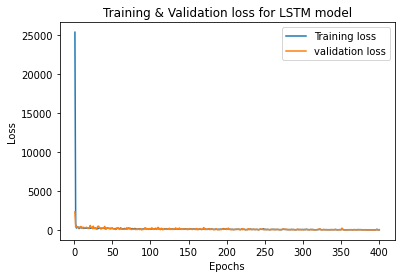

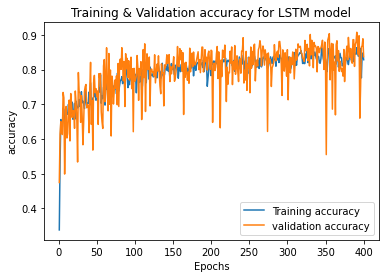

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 401) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 401) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


In [ ]:
# load  into new model
LSTM_model = load_model("/content/model_init_2021-03-1414_32_20.401151/model-00391-16.38625-0.86335-8.53996-0.90775.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = LSTM_model.evaluate(X_test_mini, y_test_mini, verbose=1)
print("%s: %.2f%%" % (LSTM_model.metrics_names[1], score[1]*100))

Loaded model from disk
5000/5000 [==============================] - 7s 1ms/step - loss: 8.3574 - accuracy: 0.9074
accuracy: 90.78%


In [ ]:
y_pred_LSTM_test = pd.DataFrame(LSTM_model.predict(X_test_mini).argmax(axis=1))
y_actual_test = pd.DataFrame(y_test_mini.argmax(axis=1))

# Decoding predicted test labels back from label encoded values.
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==7,0]= 'PartOfAHorizontalPortScan'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==1,0]= 'Benign'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==2,0]= 'C&C'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==5,0]= 'DDoS'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==0,0]= 'Attack'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==4,0]= 'C&C-Torii'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==3,0]= 'C&C-FileDownload'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==6,0]= 'FileDownload'

# Decoding Actual test labels back from label encoded values.
y_actual_test.loc[y_actual_test[0]==7,0]= 'PartOfAHorizontalPortScan'
y_actual_test.loc[y_actual_test[0]==1,0]= 'Benign'
y_actual_test.loc[y_actual_test[0]==2,0]= 'C&C'
y_actual_test.loc[y_actual_test[0]==5,0]= 'DDoS'
y_actual_test.loc[y_actual_test[0]==0,0]= 'Attack'
y_actual_test.loc[y_actual_test[0]==4,0]= 'C&C-Torii'
y_actual_test.loc[y_actual_test[0]==3,0]= 'C&C-FileDownload'
y_actual_test.loc[y_actual_test[0]==6,0]= 'FileDownload'


In [ ]:
cm = metrics.confusion_matrix(y_pred_LSTM_test, y_actual_test)
cm

array([[19956,    95,     7,     0,     0,     0,     0,   100],
       [    0, 15781,     0,     0,     0,     0,     0,   433],
       [   17,   980, 18902,     0,     0,    23,     0,  5120],
       [    0,     0,     0, 20000,     0,     0,     0,     0],
       [    0,   194,     2,     0, 19570,    22,     0,  1868],
       [    2,    63,   786,     0,     0, 19785,     0,  1233],
       [    0,     0,     0,     0,     0,     0, 20000,     0],
       [   25,  2887,   303,     0,   430,   170,     0, 11246]])

Confusion matrix, without normalization


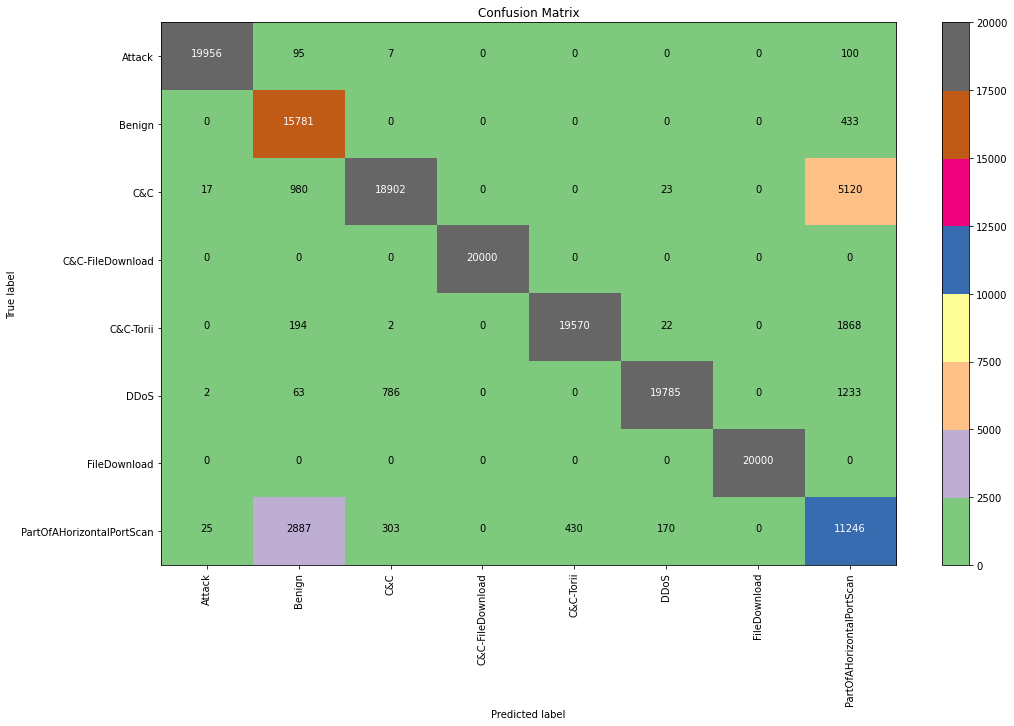

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap= plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap='Accent', aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm=cm, classes=['Attack','Benign','C&C', 'C&C-FileDownload','C&C-Torii','DDoS','FileDownload','PartOfAHorizontalPortScan'], title='Confusion Matrix')

In [ ]:
print(metrics.classification_report(y_actual_test, y_pred_LSTM_test))

                           precision    recall  f1-score   support

                   Attack       0.99      1.00      0.99     20000
                   Benign       0.97      0.79      0.87     20000
                      C&C       0.75      0.95      0.84     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.90      0.98      0.94     20000
                     DDoS       0.90      0.99      0.95     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.75      0.56      0.64     20000

                 accuracy                           0.91    160000
                macro avg       0.91      0.91      0.90    160000
             weighted avg       0.91      0.91      0.90    160000



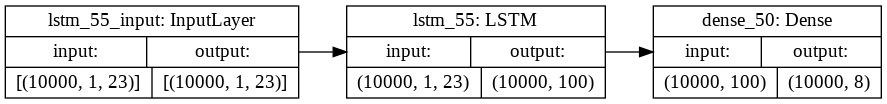

In [ ]:
import keras
keras.utils.plot_model(LSTM_model, show_shapes=True, rankdir='LR')


In [ ]:
r = pd.concat([pd.DataFrame(history_dict['val_accuracy']), pd.DataFrame(history_dict['accuracy'])], axis=1)
r.columns =[0,1]
r.max()

0    0.907750
1    0.863347
dtype: float64

In [ ]:
history = model_lstm.fit(X_train_mini, y_train_mini, epochs=100, batch_size=10000, validation_data=(X_test_mini, y_test_mini) , verbose=1 )

Epoch 1/100
64/64 [==============================] - 9s 123ms/step - loss: 18684.2132 - accuracy: 0.2108 - val_loss: 1177.5210 - val_accuracy: 0.4318
Epoch 2/100
64/64 [==============================] - 7s 115ms/step - loss: 512.7934 - accuracy: 0.5322 - val_loss: 472.1375 - val_accuracy: 0.6743
Epoch 3/100
64/64 [==============================] - 7s 117ms/step - loss: 254.6250 - accuracy: 0.6432 - val_loss: 614.4980 - val_accuracy: 0.6655
Epoch 4/100
64/64 [==============================] - 8s 118ms/step - loss: 297.2013 - accuracy: 0.6352 - val_loss: 512.3909 - val_accuracy: 0.6241
Epoch 5/100
64/64 [==============================] - 7s 117ms/step - loss: 325.0249 - accuracy: 0.6472 - val_loss: 519.2721 - val_accuracy: 0.5727
Epoch 6/100
64/64 [==============================] - 7s 116ms/step - loss: 229.3519 - accuracy: 0.6581 - val_loss: 420.9160 - val_accuracy: 0.7557
Epoch 7/100
64/64 [==============================] - 8s 118ms/step - loss: 313.3137 - accuracy: 0.6722 - val_loss: 

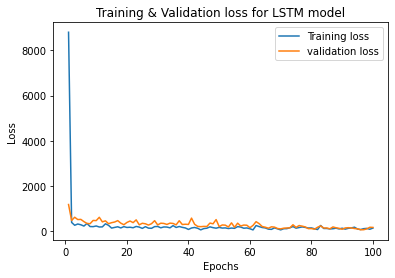

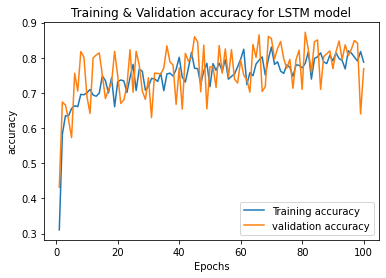

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


In [ ]:
history = model_lstm.fit(X_train_mini, y_train_mini, epochs=1000, batch_size=100, validation_data=(X_test_mini, y_test_mini) , verbose=1 )

Epoch 1/1000
1/1 [==============================] - 0s 102ms/step - loss: 113.8570 - accuracy: 0.8700 - val_loss: 111.3131 - val_accuracy: 0.8100
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 84.6619 - accuracy: 0.8900 - val_loss: 119.5603 - val_accuracy: 0.8000
Epoch 3/1000
1/1 [==============================] - 0s 55ms/step - loss: 133.5201 - accuracy: 0.7500 - val_loss: 80.6098 - val_accuracy: 0.7700
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - loss: 58.2249 - accuracy: 0.7100 - val_loss: 150.6901 - val_accuracy: 0.8000
Epoch 5/1000
1/1 [==============================] - 0s 53ms/step - loss: 113.5654 - accuracy: 0.8500 - val_loss: 213.8925 - val_accuracy: 0.8400
Epoch 6/1000
1/1 [==============================] - 0s 55ms/step - loss: 160.5916 - accuracy: 0.8500 - val_loss: 243.6172 - val_accuracy: 0.7900
Epoch 7/1000
1/1 [==============================] - 0s 53ms/step - loss: 179.9066 - accuracy: 0.8500 - val_loss: 242.6383 - val_accu

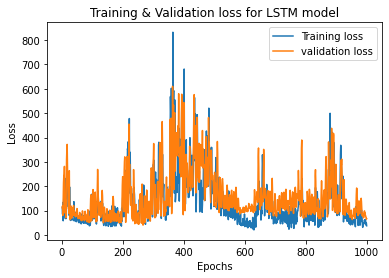

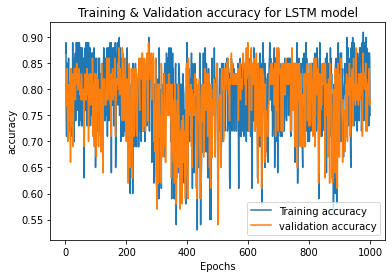

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 1001) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 1001) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()
